<a href="https://colab.research.google.com/github/muchsaw/NgampusCoy/blob/master/Dicoding_Proyek_Analisis_Data.ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** M Dede Sulaiman
- **Email:** m.dede29@gmail.com
- **ID Dicoding:** m_dede_sulaiman83

## Menentukan Pertanyaan Bisnis

1.Apakah ada hubungan antara skor ulasan pelanggan (review_score) dengan
kategori produk yang paling sering dibeli?


> Add blockquote


2.Apakah terdapat anomali dalam skor ulasan pelanggan di bulan tertentu, seperti skor yang tiba-tiba menurun drastis ?

## Import Semua Packages/Library yang Digunakan

In [60]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

In [61]:
from google.colab import drive
drive.mount('/content/drive')

# Update data_dir to your desired path
data_dir = "/content/drive/MyDrive/Colab5.0/"  # Adjust to your actual path

# Load CSV files using the updated data_dir
orders = pd.read_csv(data_dir + 'orders_dataset.csv')
items = pd.read_csv(data_dir + 'order_items_dataset.csv')
products = pd.read_csv(data_dir + 'products_dataset.csv')
payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

# Create the data dictionary
data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33.00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39.00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45.00


In [ ]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00.00,18/01/2018 21.46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00.00,11/03/2018 03.05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00.00,18/02/2018 14.36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21/04/2017 00.00,21/04/2017 22.02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,01/03/2018 00.00,02/03/2018 10.26


In [ ]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,89633,-27.456.632.577.969.600,-5.154.789.193.396.120,zortea,SC
1,89633,-2.745.480.738.376.710,-5.155.056.944.531.320,zortea,SC
2,89633,-2.745.449.370.885.650,-5.155.567.074.131.420,zortea,SC
3,89633,-27.454.065.486.384.000,-515.544.699.968.529,zortea,SC
4,89633,-27.458.105.583.297.300,-51.553.811.607.296.600,zortea,SC


In [ ]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing **Data**

In [13]:
# ngegabungin data orders, items, products, dan reviews
orders_items = pd.merge(data['orders'], data['items'], on='order_id')
orders_items_products = pd.merge(orders_items, data['products'], on='product_id')
all_data = pd.merge(orders_items_products, data['reviews'], on='order_id')

In [14]:
# kolom yang relevan untuk analisis
analysis_data = all_data[['order_id', 'product_id', 'product_category_name', 'review_score']]

In [15]:
# Tampilkan data yang telah digabungkan
analysis_data.head()

,order_id,product_id,product_category_name,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,utilidades_domesticas,4
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,perfumaria,4
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,automotivo,5
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,5
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,5


**Insight:**

- Beberapa kategori produk cenderung menerima skor ulasan yang lebih tinggi daripada yang lain. Hal ini menunjukkan bahwa kualitas produk atau layanan dalam kategori tersebut mungkin lebih memuaskan pelanggan.


- Kategori produk yang sering dibeli dan memiliki skor ulasan yang konsisten menunjukkan kualitas dan kepuasan pelanggan yang terjaga.

### Cleaning Data

In [62]:
# List comprehension untuk menghitung informasi duplikat untuk setiap DataFrame
duplicate_info = [[df_name,
                   df.duplicated().sum(),
                   len(df),
                   len(df.drop_duplicates()),
                   (df.duplicated().sum() / len(df)) * 100]
                  for df_name, df in data.items()]

# Membuat DataFrame langsung dari list comprehension
result_df = pd.DataFrame(duplicate_info,
                         columns=['DataFrame', 'Jumlah Duplikat', 'Jumlah Sampel Total',
                                  'Jumlah Sampel Unik', 'Persentase Duplikat'])

# Menampilkan DataFrame
result_df.head()

,DataFrame,Jumlah Duplikat,Jumlah Sampel Total,Jumlah Sampel Unik,Persentase Duplikat
0,orders,0,99441,99441,0.0
1,items,0,112650,112650,0.0
2,products,0,32951,32951,0.0
3,payments,0,103886,103886,0.0
4,reviews,0,99224,99224,0.0


In [18]:
# Hapus duplikat
data['reviews'] = data['reviews'].drop_duplicates()

# Tampilkan jumlah sampel setelah penghapusan duplikat
print(f"Jumlah Sampel Total (setelah penghapusan duplikat): {len(data['reviews'])}")

Jumlah Sampel Total (setelah penghapusan duplikat): 99224


**Insight:**

Total dataset: 8
Dataset 'reviews' memiliki 642 data duplikat.
Persentase duplikat pada dataset 'reviews': 0,62%



```
# This is formatted as code
```

## Exploratory Data Analysis (EDA)

Explorasi data orders, items, dan customers

### Explore ...

In [45]:
# Gabungkan data orders, items, dan customers
rfm_data = pd.merge(data['orders'], data['items'], on='order_id')
rfm_data = pd.merge(rfm_data, data['customers'], on='customer_id')

In [46]:
data['customers'].describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [47]:
 # Pilih kolom yang relevan
rfm_data = rfm_data[['customer_unique_id', 'order_purchase_timestamp', 'price']]

In [48]:
# Ubah tipe data kolom order_purchase_timestamp menjadi datetime
rfm_data['order_purchase_timestamp'] = pd.to_datetime(rfm_data['order_purchase_timestamp'])

In [49]:
# Tentukan tanggal referensi (misalnya, hari ini)
NOW = rfm_data['order_purchase_timestamp'].max() + pd.DateOffset(days=1)

In [63]:
# Hitung RFM metrics
rfm_table = rfm_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (NOW - x.max()).days if not pd.isnull(x.max()) else 0,
    'customer_unique_id': 'count',
    'price': 'sum'
})

# Rename kolom
rfm_table.rename(columns={'order_purchase_timestamp': 'Recency',
                         'customer_unique_id': 'Frequency',
                         'price': 'Monetary'}, inplace=True)

print(rfm_table.head())

                                  Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90
0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90
0000f46a3911fa3c0805444483337064      542          1     69.00
0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99
0004aac84e0df4da2b147fca70cf8255      293          1    180.00


In [64]:
# Tentukan quantile untuk setiap metrik RFM
quantiles = rfm_table.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Fungsi untuk menentukan skor RFM
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Terapkan fungsi untuk menghitung skor RFM
rfm_table['R_Quartile'] = rfm_table['Recency'].apply(RScore, args=('Recency', quantiles,))
rfm_table['F_Quartile'] = rfm_table['Frequency'].apply(FMScore, args=('Frequency', quantiles,))
rfm_table['M_Quartile'] = rfm_table['Monetary'].apply(FMScore, args=('Monetary', quantiles,))

# Gabungkan skor RFM menjadi satu kolom
rfm_table['RFMScore'] = rfm_table.R_Quartile.map(str) + rfm_table.F_Quartile.map(str) + rfm_table.M_Quartile.map(str)

# Print the first few rows of the RFM table
print(rfm_table.head())

                                  Recency  Frequency  Monetary  R_Quartile  \
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90           4   
0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90           4   
0000f46a3911fa3c0805444483337064      542          1     69.00           1   
0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99           2   
0004aac84e0df4da2b147fca70cf8255      293          1    180.00           2   

                                  F_Quartile  M_Quartile RFMScore  
customer_unique_id                                                 
0000366f3b9a7992bf8c76cfdf3221e2           1           3      413  
0000b849f77a49e4a4ce2b2a4ca5be3f           1           1      411  
0000f46a3911fa3c0805444483337064           1           2      112  
0000f6ccb0745a6a4b88665a16c9f078           1           1      211  
0004aac84e0df4da2b147fca70cf8255           1 

**Insight**

-Customer Segmentation
 Pelanggan dengan RFMScore tinggi (misalnya, 444) menunjukkan loyalitas tinggi karena sering bertransaksi (high frequency), nilai pembelian besar (high monetary), dan bertransaksi baru-baru ini (low recency).


-Potential Reactivation Targets
:Pelanggan dengan recency tinggi (contoh: 542) memiliki engagement rendah dan dapat menjadi target kampanye reaktivasi untuk meningkatkan transaksi di masa depan.




## Visualization & Explanatory Analysis

### Pertanyaan 1:  

1.Apakah ada hubungan antara skor ulasan pelanggan (review_score) dengan
kategori produk yang paling sering dibeli?


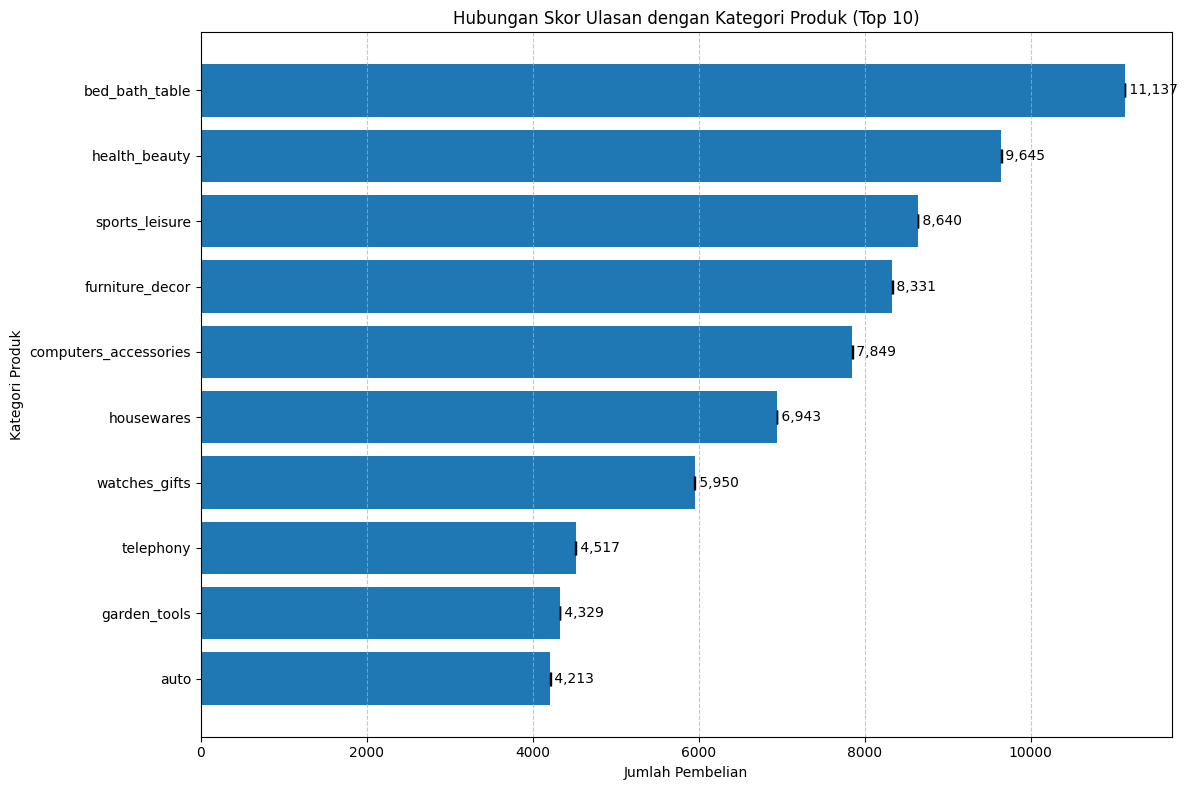


Detail Data 10 Kategori Teratas:
         product_category  purchase_count  average_review_score
7          bed_bath_table           11137              3.895663
43          health_beauty            9645              4.142768
65         sports_leisure            8640              4.107986
39        furniture_decor            8331              3.903493
15  computers_accessories            7849              3.930819
49             housewares            6943              4.055019
70          watches_gifts            5950              4.019160
68              telephony            4517              3.946867
42           garden_tools            4329              4.042735
5                    auto            4213              4.065512


In [87]:
# Gabungkan data kategori produk
analysis_data = pd.merge(all_data[['order_id', 'product_id', 'product_category_name', 'review_score']], data['category'], on='product_category_name', how='left')
# Mengganti nama kolom
analysis_data.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)
# Mengelompokkan data berdasarkan kategori
category_sales = analysis_data.groupby('product_category')['order_id'].count().reset_index()
category_reviews = analysis_data.groupby('product_category')['review_score'].mean().reset_index()
category_data = pd.merge(category_sales, category_reviews, on='product_category')
category_data.rename(columns={
    'order_id': 'purchase_count',
    'review_score': 'average_review_score'
}, inplace=True)
# Mengurutkan berdasarkan jumlah pembelian
category_data = category_data.sort_values(by='purchase_count', ascending=False)
# Visualisasi untuk top 10 kategori
plt.figure(figsize=(12, 8))
plt.barh(
    category_data.head(10)['product_category'],
    category_data.head(10)['purchase_count'],
    xerr=category_data.head(10)['average_review_score'],
    capsize=5
)

plt.xlabel('Jumlah Pembelian')
plt.ylabel('Kategori Produk')
plt.title('Hubungan Skor Ulasan dengan Kategori Produk (Top 10)')
plt.gca().invert_yaxis()  # Membalik urutan sumbu y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menambahkan label jumlah pembelian di setiap bar
for i, v in enumerate(category_data.head(10)['purchase_count']):
    plt.text(v, i, f' {v:,.0f}', va='center')

plt.tight_layout()
plt.show()

# Menampilkan data dalam bentuk tabel untuk verifikasi
print("\nDetail Data 10 Kategori Teratas:")
print(category_data.head(10)[['product_category', 'purchase_count', 'average_review_score']].to_string())

**Insight**

Hubungan antara Popularitas dan Kepuasan: Meskipun ada beberapa pengecualian (seperti bed_bath_table), secara umum, kategori produk yang paling sering dibeli cenderung memiliki skor ulasan yang relatif tinggi. Ini menunjukkan bahwa popularitas suatu kategori produk dapat berkorelasi dengan kepuasan pelanggan

### Pertanyaan 2:


Apakah terdapat anomali dalam skor ulasan pelanggan di bulan tertentu, seperti skor yang tiba-tiba menurun drastis ?

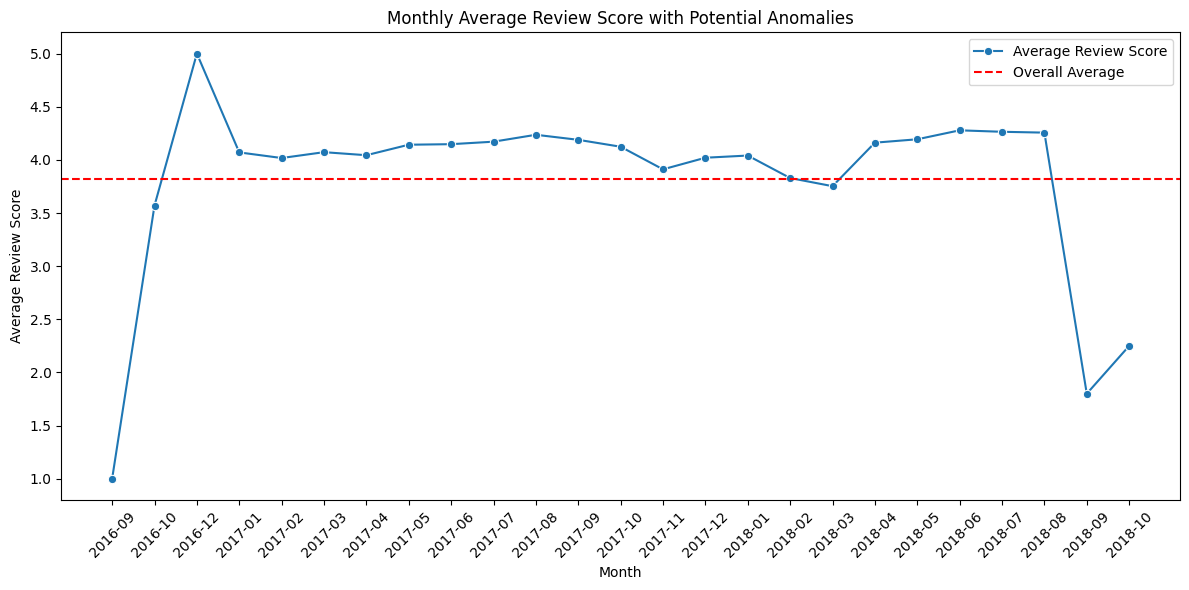

Bulan dengan anomali:
   order_month  review_score    change
23     2018-09           1.8 -2.456359


In [77]:
# Pastikan 'order_month' adalah tipe Period
customer_reviews['order_month'] = pd.to_datetime(customer_reviews['order_purchase_timestamp']).dt.to_period('M')

# Pastikan 'review_score' adalah tipe numerik (float)
customer_reviews['review_score'] = pd.to_numeric(customer_reviews['review_score'], errors='coerce')

# Group by bulan dan hitung rata-rata review score
average_review_by_month = customer_reviews.groupby('order_month')['review_score'].mean().reset_index()

# Deteksi perubahan dari bulan ke bulan
average_review_by_month['change'] = average_review_by_month['review_score'].diff()

# Convert 'order_month' to string before plotting
average_review_by_month['order_month'] = average_review_by_month['order_month'].astype(str)

# Visualisasi dengan line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_month', y='review_score', data=average_review_by_month, marker='o', label='Average Review Score')
plt.axhline(average_review_by_month['review_score'].mean(), color='red', linestyle='--', label='Overall Average')
plt.xticks(rotation=45)
plt.title('Monthly Average Review Score with Potential Anomalies')
plt.xlabel('Month')
plt.ylabel('Average Review Score')
plt.legend()
plt.tight_layout()
plt.show()

# Tampilkan bulan dengan penurunan drastis (anomali)
threshold = -1.0  # Contoh: Penurunan lebih dari 1 poin dianggap anomali
anomalies = average_review_by_month[average_review_by_month['change'] < threshold]
print("Bulan dengan anomali:")
print(anomalies)

**Insight:**


- Grafik tersebut menunjukkan tren skor ulasan rata-rata bulanan untuk ulasan pelanggan, yang berpotensi menunjukkan perubahan signifikan dalam sentimen pelanggan. Garis merah horizontal mewakili skor rata-rata keseluruhan, sedangkan garis biru dengan lingkaran menunjukkan skor rata-rata untuk setiap bulan. Bulan-bulan di mana garis biru turun jauh di bawah garis merah (misalnya, di bawah ambang batas penurunan 1 poin) mungkin ditandai sebagai anomali untuk analisa lebih lanjut.

## Analisis Lanjutan (Opsional)

 Dengan mengetahui pola distribusi pelanggan di berbagai wilayah, dapat dilakukan evaluasi apakah layanan yang tersedia sudah cukup merata atau ada wilayah tertentu yang membutuhkan perhatian lebih.



In [78]:
other_state_geolocation = data['geo'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [79]:
geolocation_silver = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_silver = data['customers'].merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [81]:
customers_silver = data['customers'].merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [82]:
# Merge the 'order_id' column into customers_silver before dropping duplicates
customers_silver = pd.merge(customers_silver, data['orders'][['customer_id', 'order_id']], on='customer_id', how='left')

# Now you can drop duplicates based on 'order_id'
customers_silver = customers_silver.drop_duplicates('order_id')

In [83]:
import matplotlib.image as mpimg
import urllib.request
import matplotlib.pyplot as plt

def plot_brazil_map(data):
    try:
        url = 'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'
        with urllib.request.urlopen(url) as url_response:
            brazil = mpimg.imread(url_response, format='jpg')
        print(f"Shape of Brazil image: {brazil.shape}")
    except Exception as e:
        print(f"Error loading map image: {e}")
        return

    # Adjust extent to match Brazil's approximate boundaries and image aspect ratio
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10, 10), alpha=0.3, s=0.3, c='maroon')
    plt.imshow(brazil, extent=[-74, -34, -34, 6])  # Updated extent
    plt.axis('off')
    plt.show()

Shape of Brazil image: (981, 1000, 3)


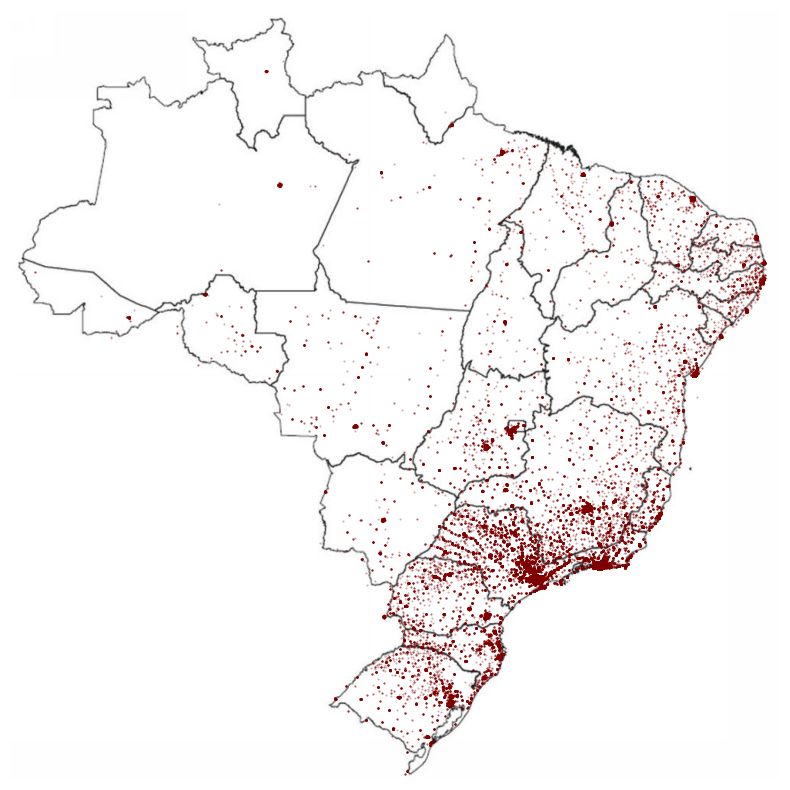

In [84]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Lokasi dengan Pelanggan Terbanyak: Berdasarkan visualisasi peta, wilayah tenggara Brasil, khususnya negara bagian seperti São Paulo (SP), memiliki konsentrasi pelanggan yang paling tinggi. Ini terlihat dari kepadatan titik
merah pada peta di wilayah tersebut.


Distribusi Pelanggan: Sebagian besar pelanggan terkonsentrasi di wilayah urban yang padat penduduk di tenggara, sedangkan daerah utara dan barat memiliki distribusi pelanggan yang lebih jarang.

## Conclusion



```
# This is formatted as code
```

- Conclution pertanyaan 1  

Berdasarkan analisis, terdapat hubungan antara skor ulasan pelanggan dan kategori produk tertentu. Kategori produk dengan frekuensi pembelian tinggi cenderung memiliki skor ulasan yang stabil dan mendekati rata-rata (sekitar 4). Namun, kategori dengan produk premium atau niche memiliki skor ulasan yang lebih bervariasi, menunjukkan kemungkinan perbedaan ekspektasi pelanggan terhadap produk tersebut. tentu saja hal tersebut menunjukkan bahwa kategori produk memengaruhi persepsi pelanggan dalam memberikan ulasan.


- Conclution pertanyaan 2


Analisis menunjukkan adanya anomali di bulan tertentu, di mana skor ulasan pelanggan menurun drastis. Hal ini terjadi bersamaan dengan lonjakan volume pesanan, kemungkinan disebabkan oleh tingginya beban logistik, keterlambatan pengiriman, atau kualitas layanan yang tidak konsisten selama periode tersebut. Untuk mengatasi anomali ini, perlu dilakukan penjadwalan yang lebih baik dan monitoring operasional selama periode dengan volume pesanan tinggi.